# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [25]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

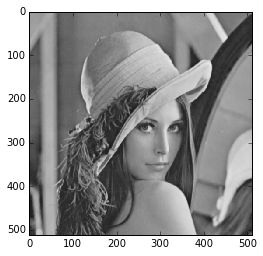

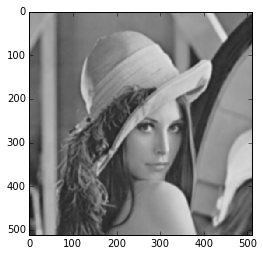

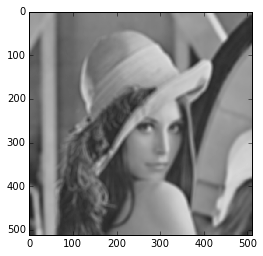

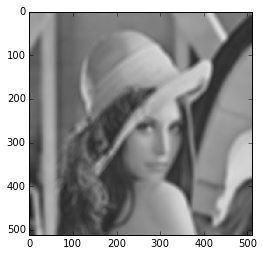

In [26]:
    from skimage.morphology import disk
    from skimage.filters.rank import mean
    plt.figure()
    avg_1 = mean(lena_im,disk(1))
    io.imshow(avg_1)
    
    plt.figure()
    avg_3 = mean(lena_im,disk(3))
    io.imshow(avg_3)
    
    plt.figure()
    avg_5 = mean(lena_im,disk(5))
    io.imshow(avg_5)
    
    plt.figure()
    avg_7 = mean(lena_im,disk(7))
    io.imshow(avg_7)
    
    

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

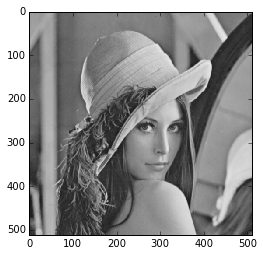

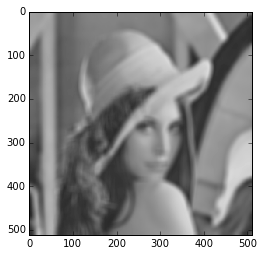

In [28]:
from scipy import ndimage

mask = np.ones((2,2),dtype=np.float)
mask = mask/np.sum(mask)
avg_a = ndimage.convolve(lena_im,mask)
plt.figure()
io.imshow(avg_a)

d = (14,14)
mask = np.ones(d,dtype=np.float)
mask = mask/np.sum(mask)
avg_b = ndimage.filters.convolve(lena_im,mask)
plt.figure()
io.imshow(avg_b)




Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [30]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

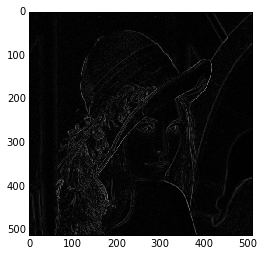

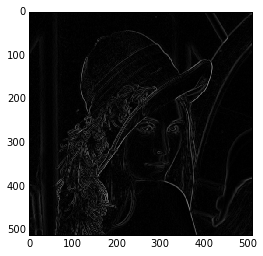

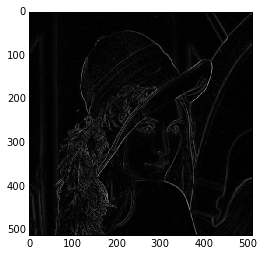

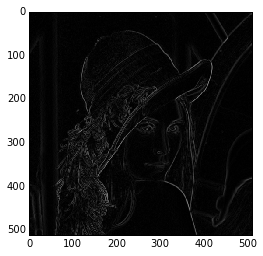

In [35]:
robert = filters.roberts(lena_im)
plt.figure()
io.imshow(robert)

prewitt = filters.prewitt(lena_im)
plt.figure()
io.imshow(prewitt)

sobel = filters.sobel(lena_im)
plt.figure()
io.imshow(sobel)

scharr = filters.scharr(lena_im)
plt.figure()
io.imshow(scharr)

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

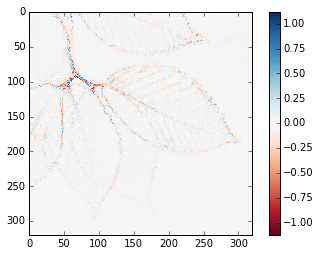

In [80]:
from skimage.color import rgb2gray
Path = './images/'
leaves_im = io.imread(Path.__add__('leaves.jpg'),)

leaves_im = img_as_float(leaves_im)
leaves_im = rgb2gray(leaves_im)
laplace = ndimage.filters.laplace(leaves_im)
plt.figure()
io.imshow(laplace)


## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [39]:
from skimage import util

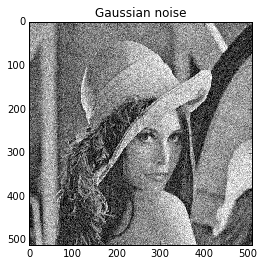

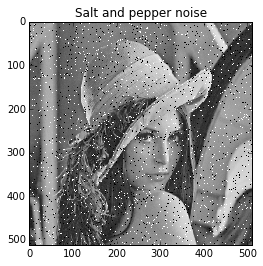

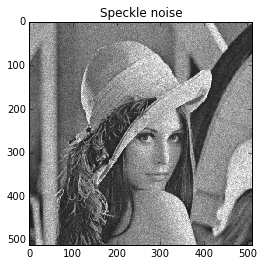

In [41]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

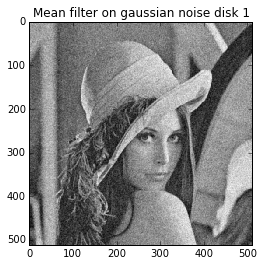

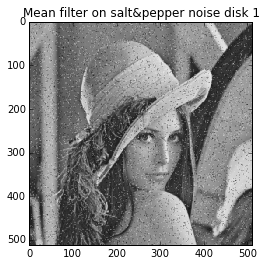

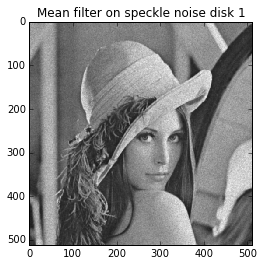

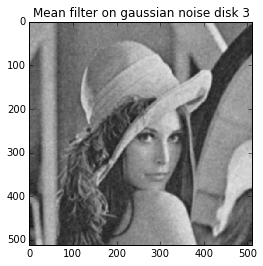

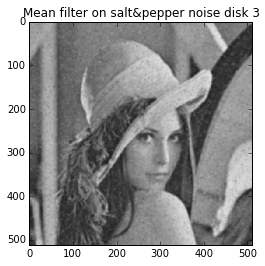

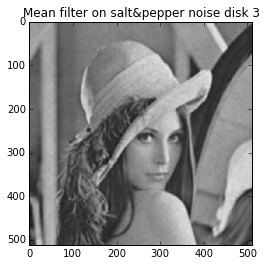

In [54]:
from skimage.morphology import disk
from skimage.filters.rank import mean
#disk 1
avg = mean(lena_gaussian,disk(1))
plt.figure()
io.imshow(avg)
plt.title('Mean filter on gaussian noise disk 1')

avg = mean(lena_sp,disk(1))
plt.figure()
io.imshow(avg)
plt.title('Mean filter on salt&pepper noise disk 1')

avg = mean(lena_speckle,disk(1))
plt.figure()
io.imshow(avg)
plt.title('Mean filter on speckle noise disk 1')

#disk 3
avg_1 = mean(lena_gaussian,disk(3))
plt.figure()
io.imshow(avg_1)
plt.title('Mean filter on gaussian noise disk 3')

avg = mean(lena_sp,disk(3))
plt.figure()
io.imshow(avg)
plt.title('Mean filter on salt&pepper noise disk 3')

avg = mean(lena_speckle,disk(3))
plt.figure()
io.imshow(avg)
plt.title('Mean filter on salt&pepper noise disk 3')

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

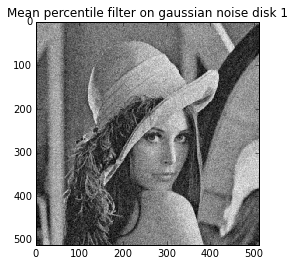

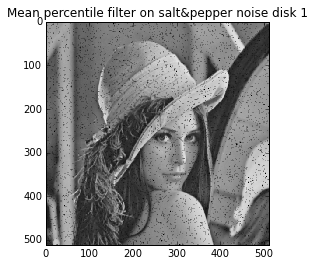

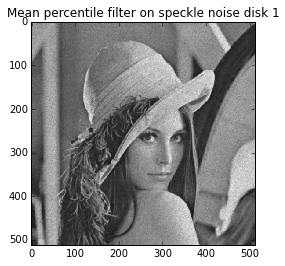

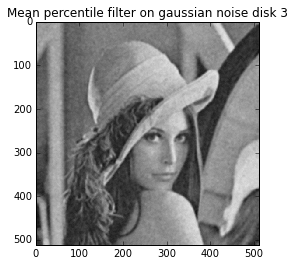

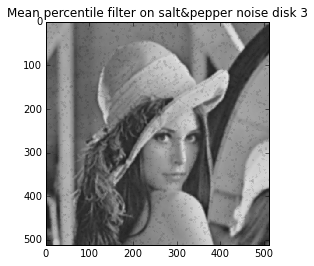

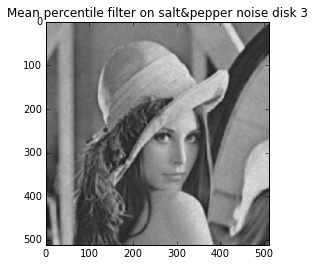

In [66]:
from skimage.filters.rank import mean_percentile
#disk 1
avg = mean_percentile(lena_gaussian,disk(1),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on gaussian noise disk 1')

avg = mean_percentile(lena_sp,disk(1),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on salt&pepper noise disk 1')

avg = mean_percentile(lena_speckle,disk(1),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on speckle noise disk 1')

#disk 3
avg_1 = mean_percentile(lena_gaussian,disk(3),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg_1)
plt.title('Mean percentile filter on gaussian noise disk 3')

avg = mean_percentile(lena_sp,disk(3),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on salt&pepper noise disk 3')

avg = mean_percentile(lena_speckle,disk(3),p0=0.05,p1=0.95)
plt.figure()
io.imshow(avg)
plt.title('Mean percentile filter on salt&pepper noise disk 3')

** median filter: **

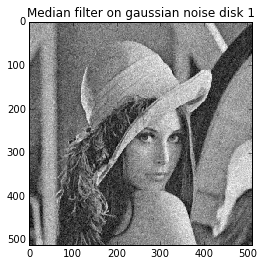

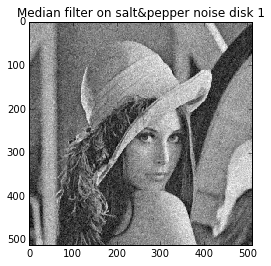

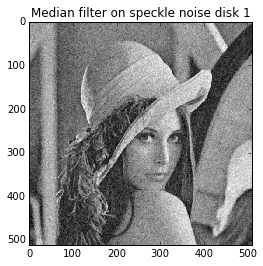

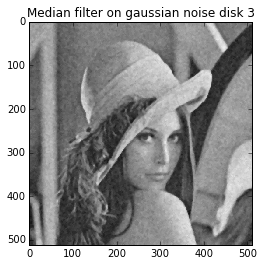

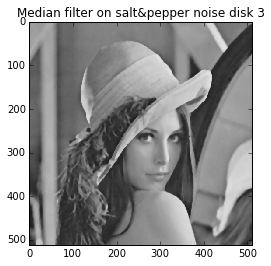

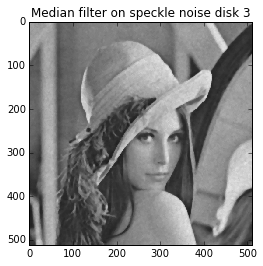

In [56]:
from skimage.filters.rank import median
#disk 1
avg_vb = median(lena_gaussian,disk(1))
plt.figure()
io.imshow(avg_v)
plt.title('Median filter on gaussian noise disk 1')

avg_vb = median(lena_sp,disk(1))
plt.figure()
io.imshow(avg_v)
plt.title('Median filter on salt&pepper noise disk 1')

avg_vb = median(lena_sp,disk(1))
plt.figure()
io.imshow(avg_v)
plt.title('Median filter on speckle noise disk 1')

#disk 3
avg_va = median(lena_gaussian,disk(3))
plt.figure()
io.imshow(avg_va)
plt.title('Median filter on gaussian noise disk 3')

avg_va = median(lena_sp,disk(3))
plt.figure()
io.imshow(avg_va)
plt.title('Median filter on salt&pepper noise disk 3')

avg_va = median(lena_speckle,disk(3))
plt.figure()
io.imshow(avg_va)
plt.title('Median filter on speckle noise disk 3')

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

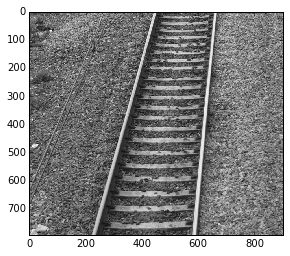

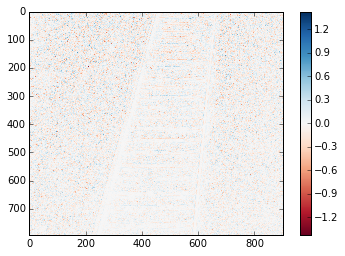

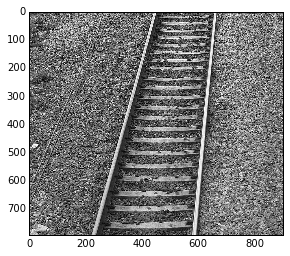

In [84]:
from skimage.color import rgb2gray
Path = './images/'
rail_im = io.imread(Path.__add__('railway.jpg'))
rail_im = rgb2gray(rail_im)
rail_im = img_as_float(rail_im)
plt.figure()
io.imshow(rail_im)

laplace = ndimage.filters.laplace(rail_im)
plt.figure()
io.imshow(laplace)

sharp = rail_im - laplace
plt.figure()
plt.imshow(sharp,cmap=cm.gray,vmin = 0, vmax=1)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

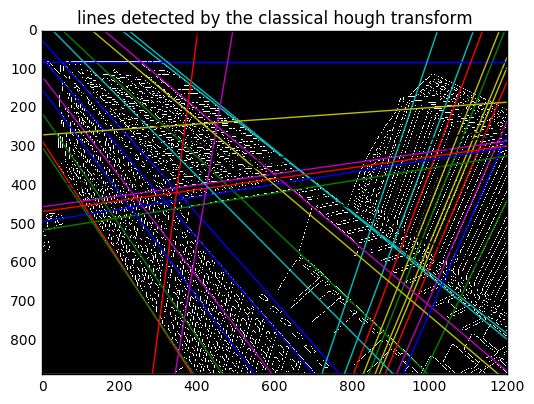

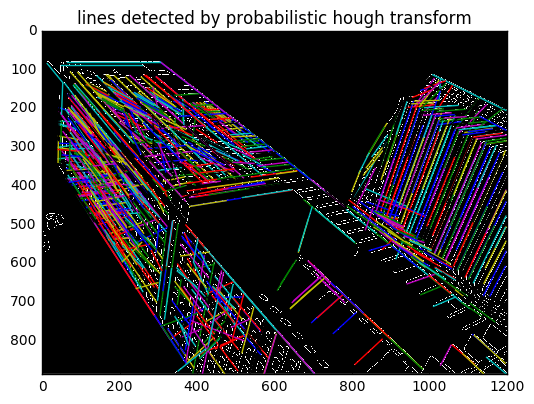

In [12]:
from skimage.transform import probabilistic_hough_line
from skimage.transform import hough_line_peaks
from skimage.transform import hough_line
from skimage import feature

image = io.imread('images/building.jpg')
image = color.rgb2grey(image)


def Hough_trans(im, sig = 3):
    im_edges = feature.canny(im,sigma = sig)
    
    hspace, angles, distance = hough_line(im_edges)
    
    hspace, angles, distance = hough_line_peaks(hspace,angles,distance)
    
    return(hspace,angles,distance)


hspace, angles, distance = Hough_trans(image)
plt.figure()
io.imshow(feature.canny(image,sigma = 3))
plt.title('lines detected by the classical hough transform')


cols = image.shape[1]
rows = image.shape[0]
x = np.linspace(0,cols,num = 1000)


for i in range(0, len(angles)):
    theta = angles[i]
    r = distance[i]
    m = -1.0/np.tan(theta)
    c = r/np.sin(theta)
    
    y = m*x +c
    plt.plot(x,y)
 
plt.axis((0,cols,rows,0))
plt.show()


#Using probabilistic hough transform

lines = probabilistic_hough_line(feature.canny(image,sigma =3))
plt.figure()
io.imshow(feature.canny(image, sigma =3))
plt.title('lines detected by probabilistic hough transform')

for line in lines:
    start = line[0]
    x0 = start[0]
    y0 = start[1]
    
    
    end = line[1]
    x1 = end[0]
    y1 = end[1]
    
    x = np.linspace(x0,x1,num =1000)
    m = 1.0*(y1 - y0)/(x1 - x0)
    c = y1 - m*x1
    y = m*x + c
    
    plt.plot(x,y)

plt.axis((0,cols,rows,0))
plt.show()